# BWT - Deep Learning Track
## Task#23 : Dataset Loading and Understanding Training, Validation and Test Sets
### Adil Mubashir Chaudhry

## Evaluating Machine Learning Models

In the examples we did before we split the data into a training set, a validation set and a test set. As we saw all three models began to overfit. That is , their performance on never-before-seen dat started stalling (or worsening) compared to their performance on training data - which always improves as training progresses.

In machine learning,  the goal is to acheive models that generalize - that perform well on never-before-seen data - and overfitting is a central obstacle. Therefore there is a need to split data for the evaluation of our machine learning models

## Training, validation and test sets

Evaluating a modell always boils down to splitting the available data into 3 sets: training, validation and test.
  - You train on the training data
  - Evaluate your model on the validation dat
  - As a final test you use the test final
  
The reason for a validatoin set is to use it as for tuning hyperparameters of our model using a feedback signal of the model on the validation set. The tuning is a form of learning.

Then theres also a concept of data leaking, which causes a model to artificially work well on the training and validation data but not as well on unseen data.

Splitting your data into training, validation, and test sets may seem straightforward, but there are a few advanced ways to do it that can come in handy when little data is available. Let’s review three classic evaluation recipes: simple hold-out validation, Kfold validation, and iterated K-fold validation with shuffling.

### Simple Hold-Out Validation

Set apart a fraction of your data as test set. Train on remaining data and evaluate on the test.

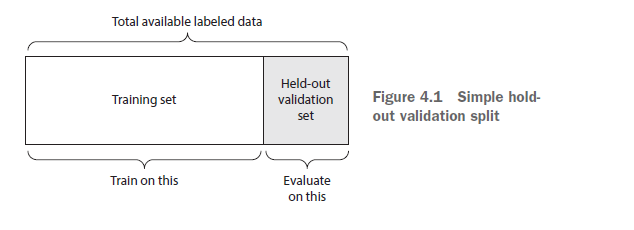

below is what a simple Hold-Out Validation code looks like

In [ ]:
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data)

### K-Fold Validation

With this approach you split data into k partitions of equal size. For each partition i train model on the remaining k-1 partitions and evaluate on the partition i. Final score is teh average of all K scores obtained

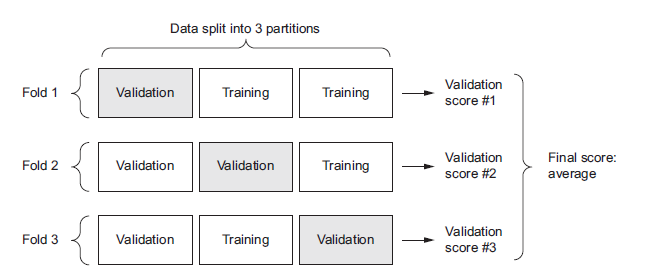

below is implementation in code

In [ ]:
k = 4

num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
        num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
        data[num_validation_samples * (fold + 1):]
        
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
    
validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

### Iterated K-Fold Validation with Shuffling

This one is for situations in which you have relatively little data available and you need to evaluate your model as precisely as possible. I’ve found it to be extremely helpful in Kaggle competitions. It consists of applying K-fold validation multiple times, shuffling the data every time before splitting it K ways. The final score is the average of the scores obtained at each run of K-fold validation. Note that you end up training and evaluating P × K models (where P is the number of iterations you use), which can be very expensive.

### Things to Keep in Mind

   - Data Representativeness : You want both training and test data to represent all the classes within your data at hand.
   - Arrow of time : If you are prediting future given the past you should not randomly suffle your data
   - Redundancy in your data : Make sure your training set and validation set are disjoint